In [1]:
import pandas as pd
import numpy as np


In [2]:


df = pd.read_csv("spam.csv", encoding="utf-8", encoding_errors="ignore")



In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5228,spam,PRIVATE! Your 2003 Account Statement for <fone...,NaN,NaN,NaN
55,ham,Do you know what Mallika Sherawat did yesterda...,NaN,NaN,NaN
997,ham,Not a lot has happened here. Feels very quiet....,NaN,NaN,NaN
3189,ham,Hi neva worry bout da truth coz the truth will...,NaN,NaN,NaN
3532,ham,"Sorry, I'll call later",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#Data Cleaning
#EDA
#Text Preprocessing
#Model  Building
#Evaluation
#Improvement
#Website
#Deployment 


 # 1.Data Cleaning 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df = df.iloc[:,0:2]

In [10]:
df.sample(5)

,v1,v2
43,ham,WHO ARE YOU SEEING?
1249,ham,"I call you later, don't have network. If urgnt..."
4929,spam,"Hi, the SEXYCHAT girls are waiting for you to ..."
2378,ham,"Hi, Mobile no. &lt;#&gt; has added you in th..."
1041,ham,I'm in class. Will holla later


In [11]:
#Rename
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2682,ham,I got a call from a landline number. . . I am ...
4819,spam,Check Out Choose Your Babe Videos @ sms.shsex....
3313,ham,Oh gei. That happend to me in tron. Maybe ill ...
4429,ham,Yar lor... How u noe? U used dat route too?
1312,ham,I love u 2 babe! R u sure everything is alrite...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#check for duplicates
df.duplicated().sum()

404

In [17]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5168, 2)

2.EDA 

In [20]:
df.shape

(5168, 2)

In [21]:
df['target'].value_counts()/df.shape[0]*100

target
0    87.383901
1    12.616099
Name: count, dtype: float64

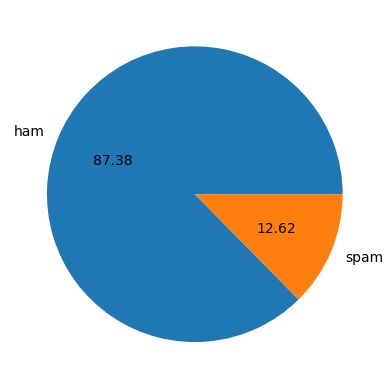

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
#Data is imbalanced


In [24]:
import nltk


In [2]:
!pip install nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Error with downloaded zip file


False

In [5]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Error with downloaded zip file
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kaman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head() 

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.sample(5)

,target,text,num_characters,num_words
414,1,100 dating service cal;l 09064012103 box334sk38ch,49,8
4809,0,"Honey, can you pls find out how much they sell...",151,33
3512,0,Staff of placement training in Amrita college.,46,8
4248,0,Loosu go to hospital. De dont let it careless.,46,11
284,0,Yeah I think my usual guy's still passed out f...,121,28


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] ==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [34]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

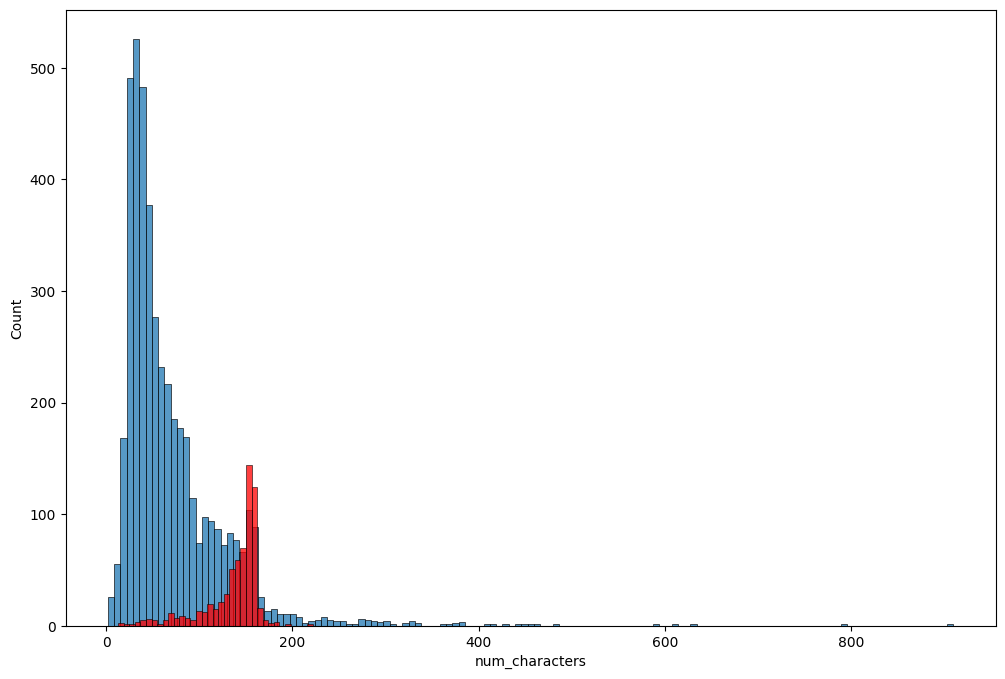

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

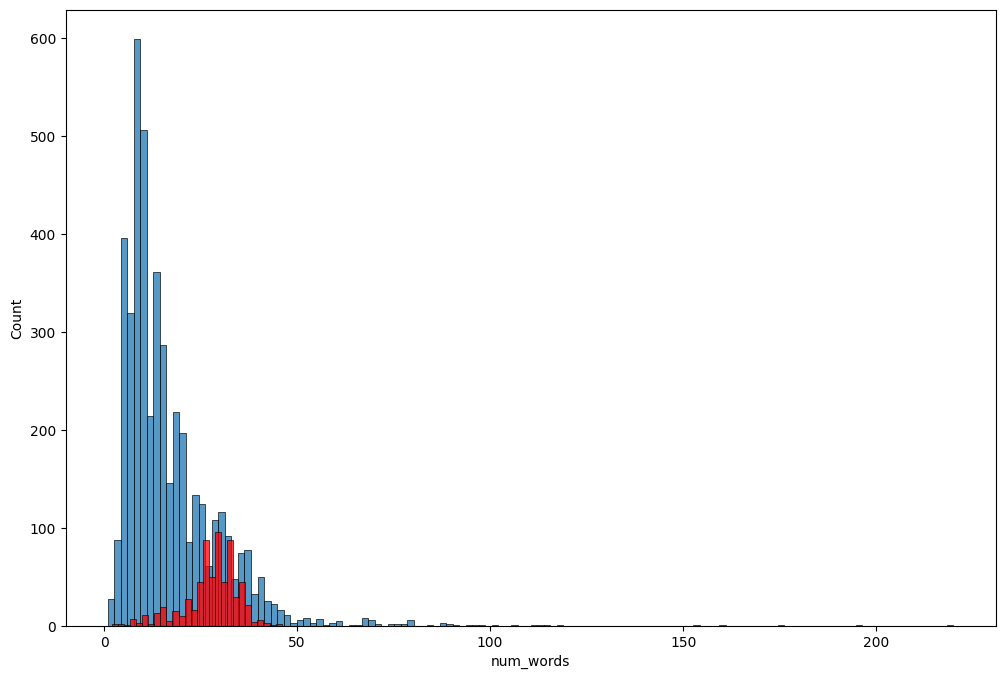

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

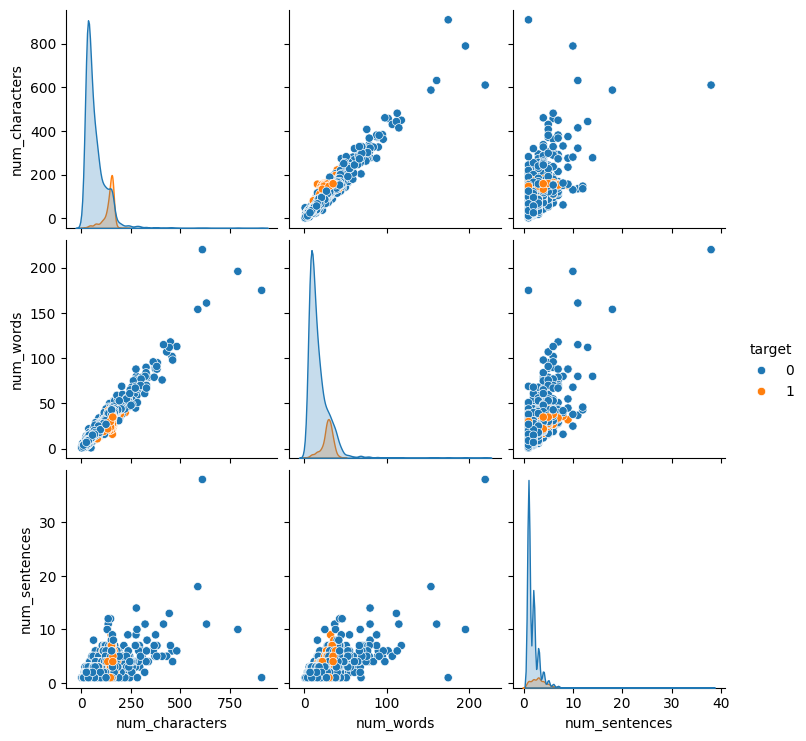

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

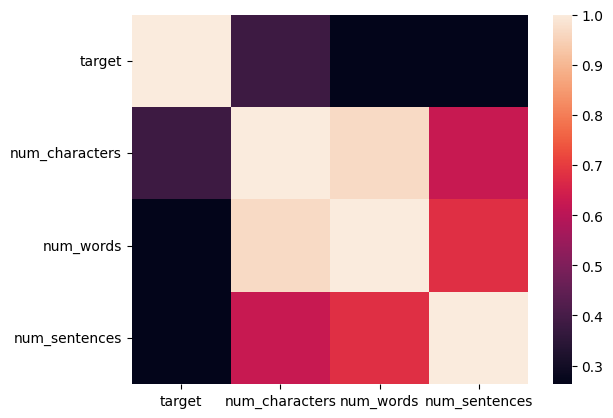

In [38]:
sns.heatmap(df.corr(numeric_only=True))

Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming


In [59]:
import nltk


from nltk.corpus import stopwords
import string


In [60]:
def  transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
        

In [61]:
transform_text('Hii! How@ Are% {You Aman')

'hii aman'

In [56]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
transform_text('Do you like to study@!#')

'like studi'

In [63]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [64]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x am xx'

In [65]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [66]:
df['transformed_text'] = df['text'].apply(transform_text)

In [67]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [89]:
!pip install wordcloud


In [70]:
from wordcloud import WordCloud


In [69]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [71]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

TypeError: asarray() got an unexpected keyword argument 'copy'

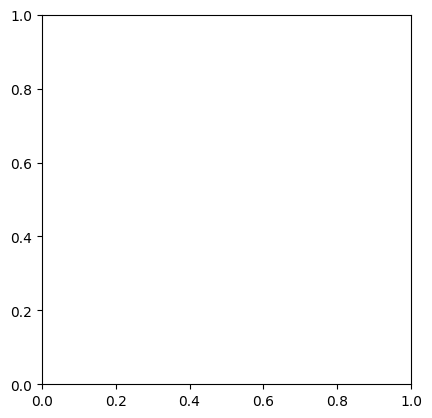

In [72]:
import matplotlib.pyplot as plt
plt.imshow(spam_wc)
plt.axis("off")


In [73]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

TypeError: asarray() got an unexpected keyword argument 'copy'

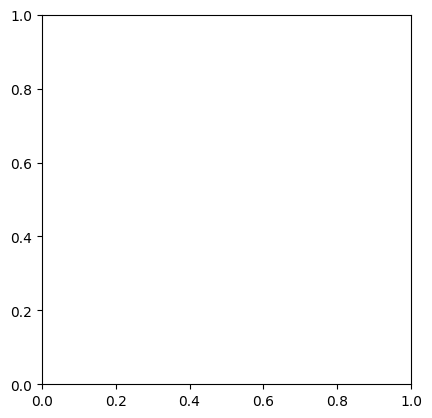

In [74]:
import matplotlib.pyplot as plt
plt.imshow(spam_wc)
plt.axis("off")


In [75]:
df.head() 

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
spam_corpus = [
    word
    for msg in df.loc[df['target'] == 1, 'transformed_text']
    for word in msg.split()
]


In [77]:
len(spam_corpus)

10106

In [78]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

C:\Users\kaman\AppData\Local\Temp\ipykernel_7324\1381919411.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word',palette='summer', data=spam_df)


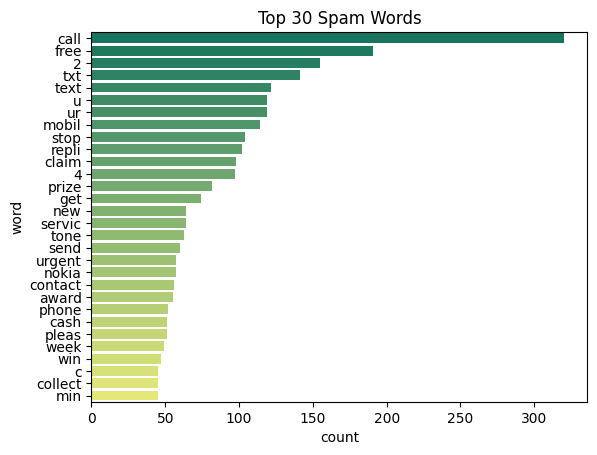

In [99]:
from collections import Counter
import pandas as pd

spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='count', y='word',palette='summer', data=spam_df)
plt.title('Top 30 Spam Words')
plt.show()




In [80]:
ham_corpus = [
    word
    for msg in df.loc[df['target'] == 0, 'transformed_text']
    for word in msg.split()
]


In [81]:
len(ham_corpus)

35380

In [82]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30)))

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

C:\Users\kaman\AppData\Local\Temp\ipykernel_7324\659612892.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


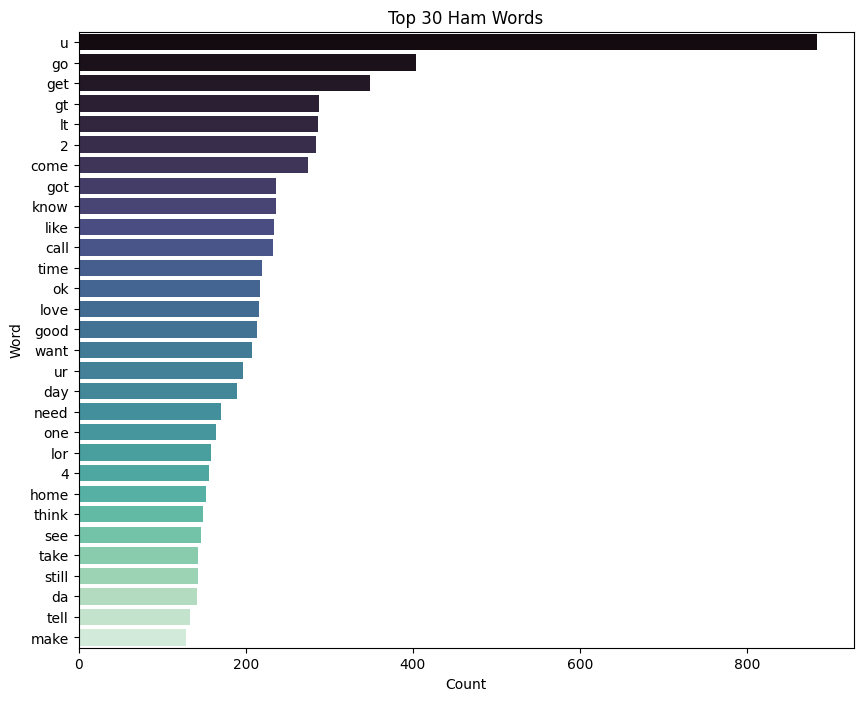

In [83]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ham_df = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=['word', 'count']
)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='count',
    y='word',
    data=ham_df,
    palette='mako'
)
plt.title('Top 30 Ham Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()



In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [114]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() 
tfidf = TfidfVectorizer()

In [86]:
df['transformed_text'] 

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u 750 pound prize 2 cla...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5168, dtype: object

In [115]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [116]:
X.shape

(5168, 6704)

In [117]:
y = df['target'].values

In [118]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [119]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
from sklearn.model_selection import train_test_split


In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [122]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score


In [123]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [124]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))

0.8771760154738878
[[792 101]
 [ 26 115]]
0.5324074074074074
0.8156028368794326


In [125]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))

0.9535783365570599
[[893   0]
 [ 48  93]]
1.0
0.6595744680851063


In [126]:
bnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))

0.8771760154738878
[[792 101]
 [ 26 115]]
0.5324074074074074
0.8156028368794326


In [135]:
!pip install xgboost --no-cache-dir


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [137]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [138]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [139]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [140]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9831932773109243)

In [142]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9831932773109243
For  KN
Accuracy -  0.8945841392649904
Precision -  1.0
For  NB
Accuracy -  0.9535783365570599
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8645833333333334
For  LR
Accuracy -  0.9516441005802708
Precision -  0.9504950495049505
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9911504424778761


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9262295081967213
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8769230769230769
For  ETC
Accuracy -  0.9748549323017408
Precision -  1.0
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9065420560747663
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9586776859504132


In [150]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Precision': precision_scores,
    'Accuracy': accuracy_scores
}).sort_values('Precision', ascending=False)

performance_df.reset_index(drop=True, inplace=True)
performance_df


,Algorithm,Precision,Accuracy
0,KN,1.000000,0.894584
1,NB,1.000000,0.953578
2,ETC,1.000000,0.974855
3,RF,0.991150,0.970986
4,SVC,0.983193,0.974855
5,xgb,0.958678,0.970986
6,LR,0.950495,0.951644
7,AdaBoost,0.926230,0.964217
8,GBDT,0.906542,0.947776
9,BgC,0.876923,0.958414


In [152]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [153]:
performance_df1

,Algorithm,variable,value
0,KN,Precision,1.000000
1,NB,Precision,1.000000
2,ETC,Precision,1.000000
3,RF,Precision,0.991150
4,SVC,Precision,0.983193
5,xgb,Precision,0.958678
6,LR,Precision,0.950495
7,AdaBoost,Precision,0.926230
8,GBDT,Precision,0.906542
9,BgC,Precision,0.876923


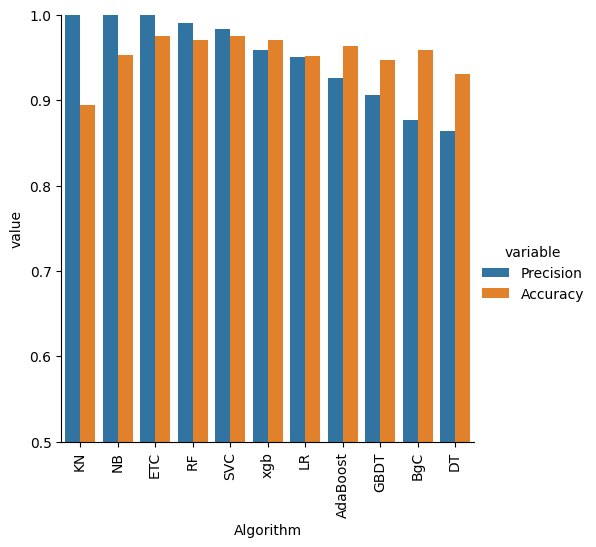

In [155]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [175]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))